# Analyzing Typography MNIST (TMNIST) Using Neural Network Classification

## Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

the first row contains column headers
The 'names' column contains font file names
The 'labels' column contains characters
The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

## Import Libraries and Function

In [1]:
import numpy as np
import pandas as pd
import os
from keras.layers.convolutional import Conv2D
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


## Reading the Input

In [2]:
data = pd.read_csv("../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")


In [3]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(274093, 786)

In [5]:
X = data.drop(columns={'names','labels'})
y = data[['labels']]

## Loading the Dataset

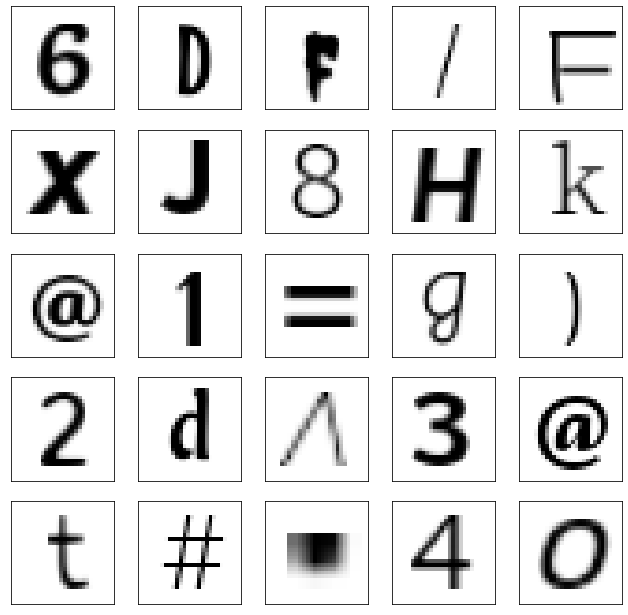

In [6]:
import matplotlib.pyplot as plt

X_images = X.values.reshape(-1,28,28)
fig,axs = plt.subplots(5,5,figsize=(11,11))
for i in range(25):
    r=i//5
    c=i%5
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i], cmap = 'Greys')
plt.show()

## Training & Test set data

In [7]:
from sklearn.model_selection import train_test_split
# Trainingset set using 75% data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [8]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(205569,)
Test labels dimension:
(68524,)


## Data Resetting for Neural Network

In [9]:
X_train, X_test = X_train/255, X_test/255

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, accuracy_score

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

##  CNN Architecture

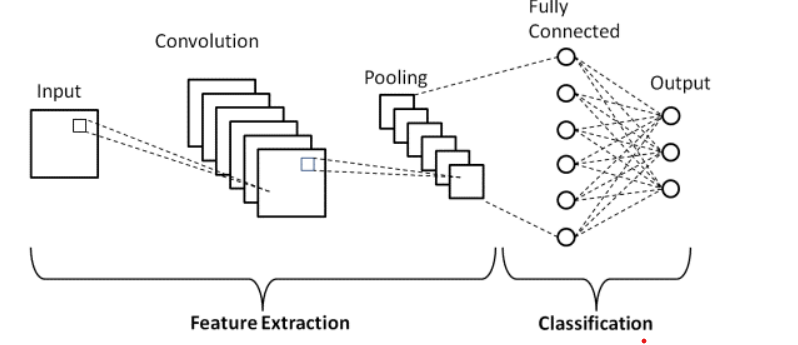

## Building the Model

In [12]:
#Building a Convolutional Neural Network

model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(y_train_label.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                11844     
Total params: 560,969
Trainable params: 560,969
Non-trainable params: 0
_________________________________________________________________


## Training the Dataset

In [14]:
cnn_result=model.fit(X_train, y_train_label, epochs=100, batch_size=200, verbose=1, validation_split=0.1)

Epoch 1/100
926/926 [==============================] - 10s 10ms/step - loss: 0.7654 - accuracy: 0.7968 - val_loss: 0.5118 - val_accuracy: 0.8408
Epoch 2/100
926/926 [==============================] - 9s 10ms/step - loss: 0.4288 - accuracy: 0.8662 - val_loss: 0.4131 - val_accuracy: 0.8706
Epoch 3/100
926/926 [==============================] - 10s 11ms/step - loss: 0.3582 - accuracy: 0.8841 - val_loss: 0.3925 - val_accuracy: 0.8768
Epoch 4/100
926/926 [==============================] - 9s 10ms/step - loss: 0.3149 - accuracy: 0.8941 - val_loss: 0.3631 - val_accuracy: 0.8843
Epoch 5/100
926/926 [==============================] - 9s 10ms/step - loss: 0.2817 - accuracy: 0.9042 - val_loss: 0.3417 - val_accuracy: 0.8909
Epoch 6/100
926/926 [==============================] - 11s 11ms/step - loss: 0.2548 - accuracy: 0.9118 - val_loss: 0.3333 - val_accuracy: 0.8971
Epoch 7/100
926/926 [==============================] - 10s 10ms/step - loss: 0.2331 - accuracy: 0.9181 - val_loss: 0.3315 - val_accur

## Testing the Model

In [15]:
test_results = model.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {round(test_results[1],4)*100}%')

2142/2142 [==============================] - 5s 2ms/step - loss: 0.8534 - accuracy: 0.9115
Test results - Accuracy: 91.14999999999999%


## Testing Model Accuracy

In [16]:
prediction = model.predict(X_test)
prediction = lb.inverse_transform(prediction)
print(f'Test results - Accuracy: {round(accuracy_score(y_test, prediction),1)*100}%')

Test results - Accuracy: 90.0%


In [17]:
# Function for Plotting
def plot_performance(data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

## Plotting the Performance of CNN model

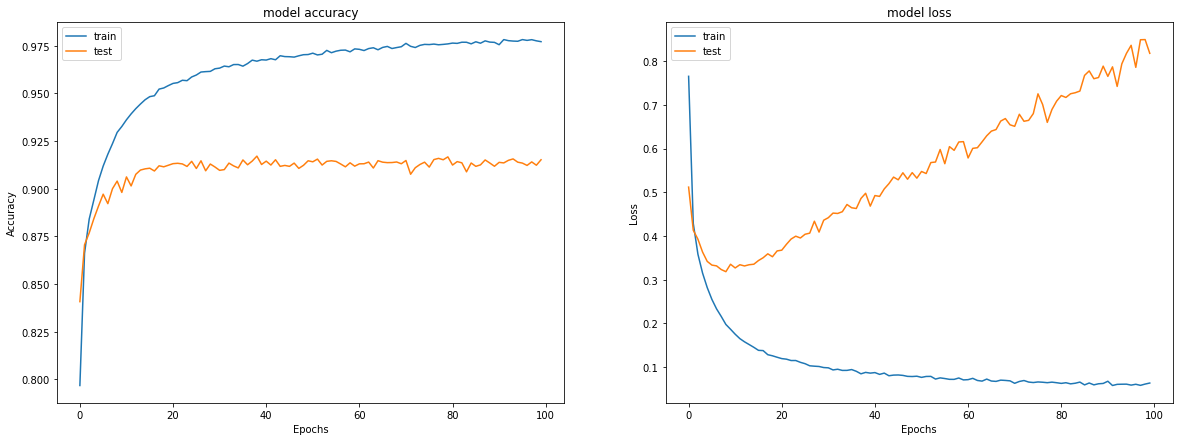

In [18]:
#Performance of a Convolutional Neural Network
plot_performance(cnn_result)

## Conclusion

By running more epochs we can most likely increase the accuracy but the accuracy speed becomes slower eventually.   
**The accuracy on this test model is 91.56% which is good for a CNN after 100 epochs.**


## Reference


* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

**MIT License**

Copyright (c) 2023 Chao Yan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.